## Step 1: Import packages

In [1]:
# Data Manipulation
library(dplyr)
library(purrr)# map_df()
library(tidyr)# gather()

#Data Visualisation
library(ggplot2)
library(corrplot)# correlation plot
library(ggmap)# to plot google map of Beijing


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.84 loaded

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



## Step 2: Import dataset-Beijing

In [2]:
data<-read.csv("D:/1.2.IBM-ICE_CSP-DATA SCIENCE-Spring 2020/Z+PROJECT/Beijing/new.csv")

## Step 3: EDA

In [3]:
print(dim(data))
print(dim(select_if(data,is.numeric)))
print(dim(select_if(data,is.factor)))

[1] 318851     26
[1] 318851     18
[1] 318851      8


<font color="red" size=3>There are 18 numeric and 8 categorical features in the dataset

In [4]:
head(data[2:26],3)

,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<dbl>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,101084782030,116.4755,40.01952,1.111027e+12,2016-08-09,1464,106,415,31680,131.00,...,1,2005,3,6,0.217,1,0,1,7,56021
2,101086012217,116.4539,39.88153,1.111027e+12,2016-07-28,903,126,575,43436,132.38,...,1,2004,4,6,0.667,1,1,0,7,71539
3,101086041636,116.5620,39.87714,1.111041e+12,2016-12-11,1271,48,1030,52021,198.00,...,4,2005,3,6,0.500,1,0,0,7,48160


In [5]:
str(data)

'data.frame':	318851 obs. of  26 variables:
 $ url                : Factor w/ 318851 levels "https://bj.lianjia.com/chengjiao/101084782030.html",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id                 : Factor w/ 318851 levels "101084782030",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Lng                : num  116 116 117 116 116 ...
 $ Lat                : num  40 39.9 39.9 40.1 39.9 ...
 $ Cid                : num  1.11e+12 1.11e+12 1.11e+12 1.11e+12 1.11e+12 ...
 $ tradeTime          : Factor w/ 2560 levels "2002-06-01","2002-07-06",..: 2046 2034 2170 2098 2065 2028 2020 2075 2072 2073 ...
 $ DOM                : num  1464 903 1271 965 927 ...
 $ followers          : int  106 126 48 138 286 57 167 138 218 134 ...
 $ totalPrice         : num  415 575 1030 298 392 ...
 $ price              : int  31680 43436 52021 22202 48396 52000 37672 49521 27917 55883 ...
 $ square             : num  131 132 198 134 81 ...
 $ livingRoom         : Factor w/ 11 levels "#NAME?","0","1",..: 4 4 5 5 4 3 4 5 3 3 ...
 $ 

In [6]:
colSums(is.na(data))

url                  id                 Lng                 Lat 
                  0                   0                   0                   0 
                Cid           tradeTime                 DOM           followers 
                  0                   0              157977                   0 
         totalPrice               price              square          livingRoom 
                  0                   0                   0                   0 
        drawingRoom             kitchen            bathRoom               floor 
                  0                   0                   0                   0 
       buildingType    constructionTime renovationCondition   buildingStructure 
               2021                   0                   0                   0 
        ladderRatio            elevator   fiveYearsProperty              subway 
                  0                  32                  32                  32 
           district    communityAverage 
                  0                 463

### To find percent of missing values

In [7]:
# is.na()-->takes a list as input and returns a list of 0 or 1, sum() helps to add all elements of the returned list
# map()--> to apply a function to elements of a list  and return a vector
# map_df()--> similar to map() but returns a dataframe
x1<-map_df(data,function(x){sum(is.na(x))})

In [8]:
x1

url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,157977,0,0,0,...,2021,0,0,0,0,32,32,32,0,463


In [9]:
#gather()-->it takes multiple columns and collapses into a key-value pair, such that values and relationships are preservedb
x2 <- gather(x1)
x2

key,value
<chr>,<int>
url,0
id,0
Lng,0
Lat,0
Cid,0
tradeTime,0
DOM,157977
followers,0
totalPrice,0


In [10]:
x3<-filter(x2,value>0)
x3

key,value
<chr>,<int>
DOM,157977
buildingType,2021
elevator,32
fiveYearsProperty,32
subway,32
communityAverage,463


In [11]:
x4<- mutate(x3,percent_missing=round(value/nrow(data)*100,digits=2))
x4<-x4[order(-x4$percent_missing),] # order by percent missing, -ve sign to order in descending order
x4

key,value,percent_missing
<chr>,<int>,<dbl>
DOM,157977,49.55
buildingType,2021,0.63
communityAverage,463,0.15
elevator,32,0.01
fiveYearsProperty,32,0.01
subway,32,0.01


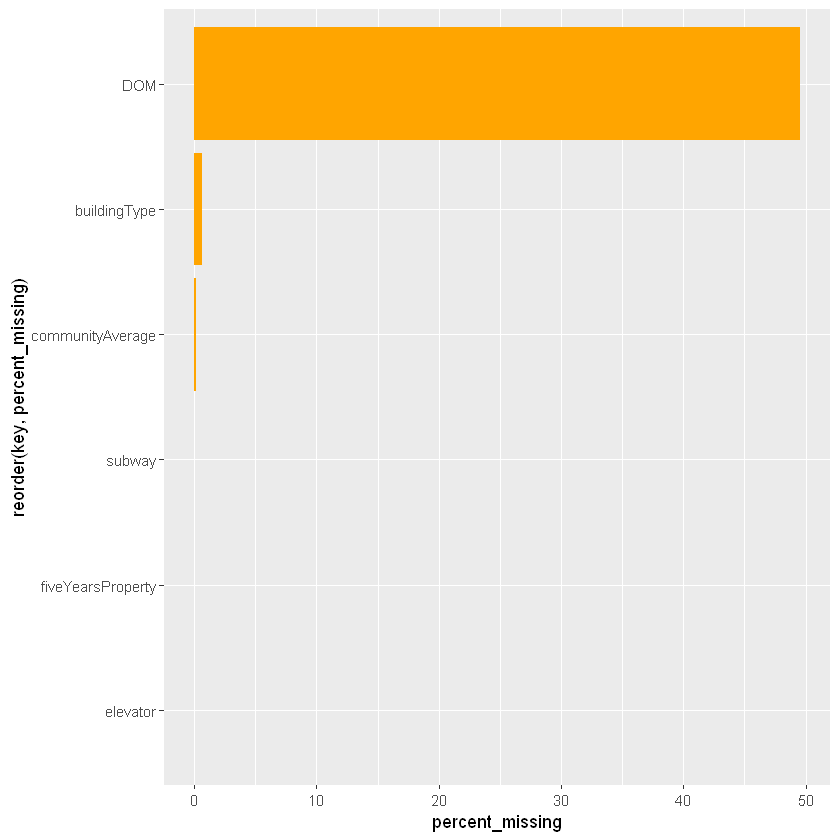

In [12]:
ggplot(x4,aes(x=reorder(key,percent_missing),y=percent_missing))+geom_bar(stat="identity",fill="orange")+coord_flip()

## Target Variable:Price- Distribution Evaluation

### Target Variable: Histogram

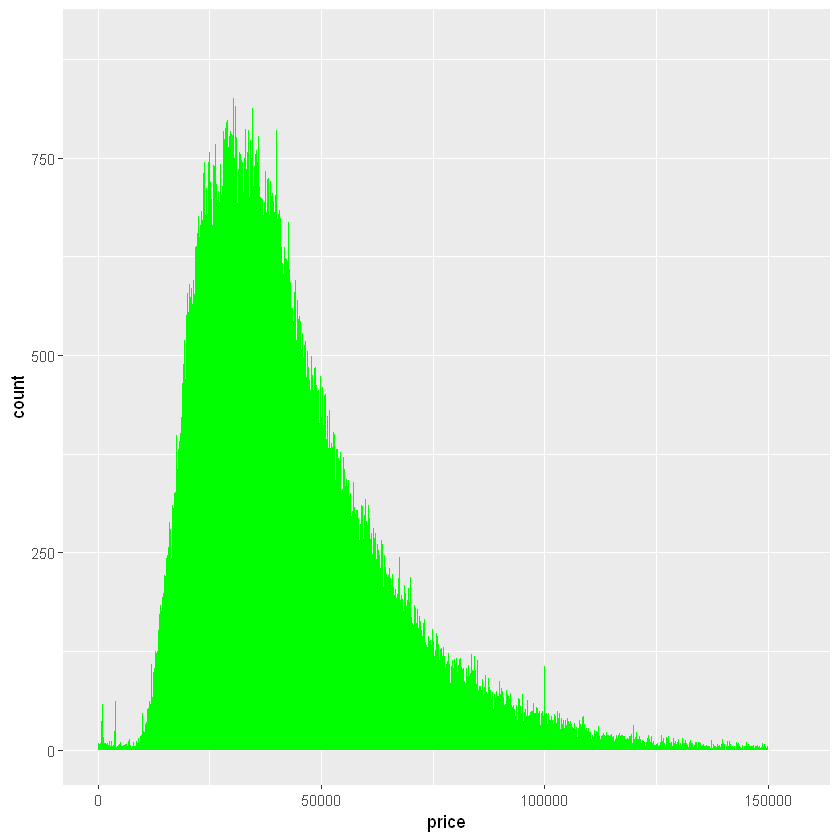

In [13]:
ggplot(data,aes(x=price)) + geom_histogram(binwidth=100,fill="green")

### Target Variable: QQ Plot

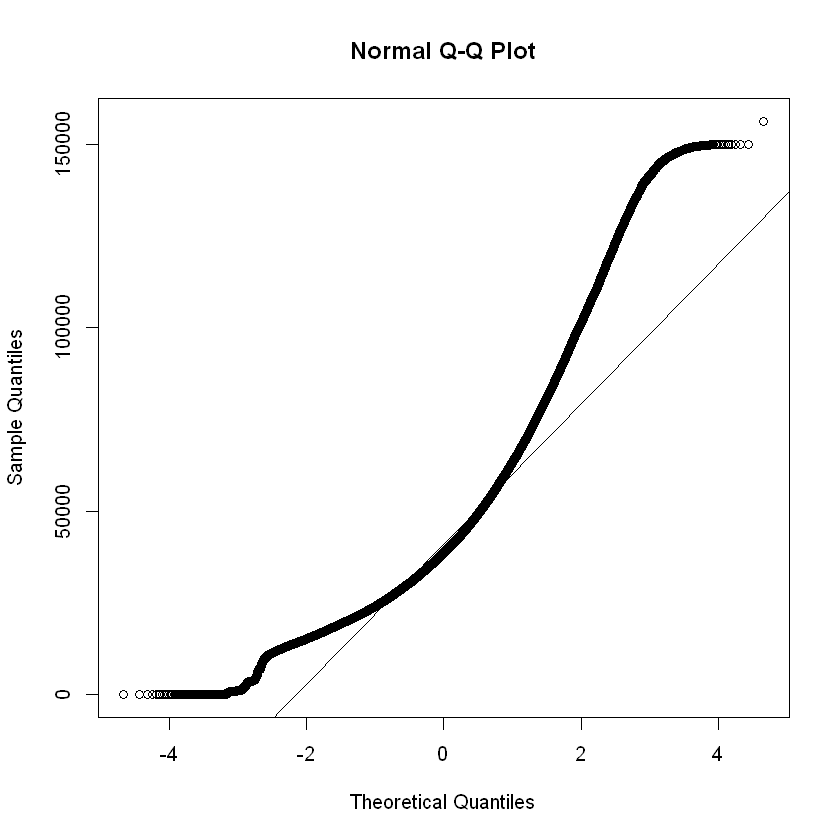

In [14]:
qqnorm(data$price)
qqline(data$price)

The price feature is not a normal distribution as the sample quantiles do not strictly fit the theoretical quantile line 

### Target Variable: Density plot

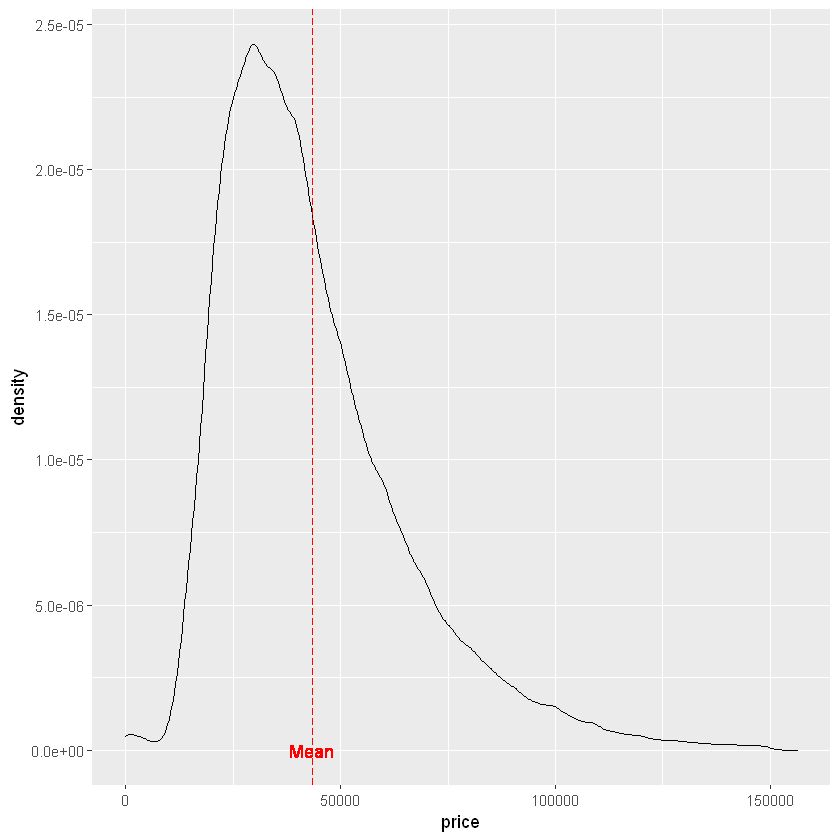

In [40]:
ggplot(data, aes(x=price))+geom_density()+geom_vline(xintercept=mean(data$price),color="red",linetype="longdash")+ geom_text(aes(x=mean(price),label="Mean",y=1*10**-10),color="red")

The price variable is right skewed with the following parameters

In [16]:
cat("\n","Mean=",round(mean(data$price,na.rm=T),digits=0),"\n",    # mean of price
    "Standard deviation=",round(sd(data$price,na.rm=T),digits=0),"\n",
   "Minimum= ",min(data$price),"\n",
   "Maximum= ",max(data$price)) # standard deviation of price


 Mean= 43530 
 Standard deviation= 21709 
 Minimum=  1 
 Maximum=  156250

## Exploring Numeric Variables
There are 18 numeric variables in total

### Correlation Plot

In [17]:
num_data<-select_if(data, is.numeric) %>% select(-Lat,-Lng,-Cid)

In [18]:
dim(num_data)

[1] 318851     15

In [19]:
# Corrplot does not work as our dataset has missing values, so removing those missing data
#Dropping DOM col
num_data<-num_data[-1]
#removing rows with missing values
num_data<-na.omit(num_data)

In [20]:
print(dim(data))
print(dim(num_data))
print(((dim(data)[1]-dim(num_data)[1])/dim(data)[1])*100) # percent of data removed

[1] 318851     26
[1] 316448     14
[1] 0.7536436


In [21]:
round(cor(num_data),2)

,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
followers,1.00,0.16,0.26,-0.05,0.01,0.01,0.24,-0.02,0,-0.02,0.05,0.02,-0.03,-0.01
totalPrice,0.16,1.00,0.64,0.56,0.08,-0.06,0.26,0.19,0,0.20,0.00,0.12,0.01,0.43
price,0.26,0.64,1.00,-0.17,0.03,-0.05,0.30,0.04,0,0.05,0.01,0.23,0.04,0.68
square,-0.05,0.56,-0.17,1.00,0.08,-0.01,0.03,0.16,0,0.19,-0.02,-0.09,-0.01,-0.15
kitchen,0.01,0.08,0.03,0.08,1.00,0.02,-0.01,-0.01,0,-0.01,0.04,0.02,-0.04,0.03
buildingType,0.01,-0.06,-0.05,-0.01,0.02,1.00,-0.01,-0.54,0,-0.63,0.00,-0.15,0.04,-0.09
renovationCondition,0.24,0.26,0.30,0.03,-0.01,-0.01,1.00,0.05,0,0.05,0.12,0.01,-0.01,0.01
buildingStructure,-0.02,0.19,0.04,0.16,-0.01,-0.54,0.05,1.00,0,0.82,-0.12,0.09,-0.10,0.07
ladderRatio,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0.00,0.00,0.00,0.00,0.00
elevator,-0.02,0.20,0.05,0.19,-0.01,-0.63,0.05,0.82,0,1.00,-0.12,0.10,-0.07,0.08


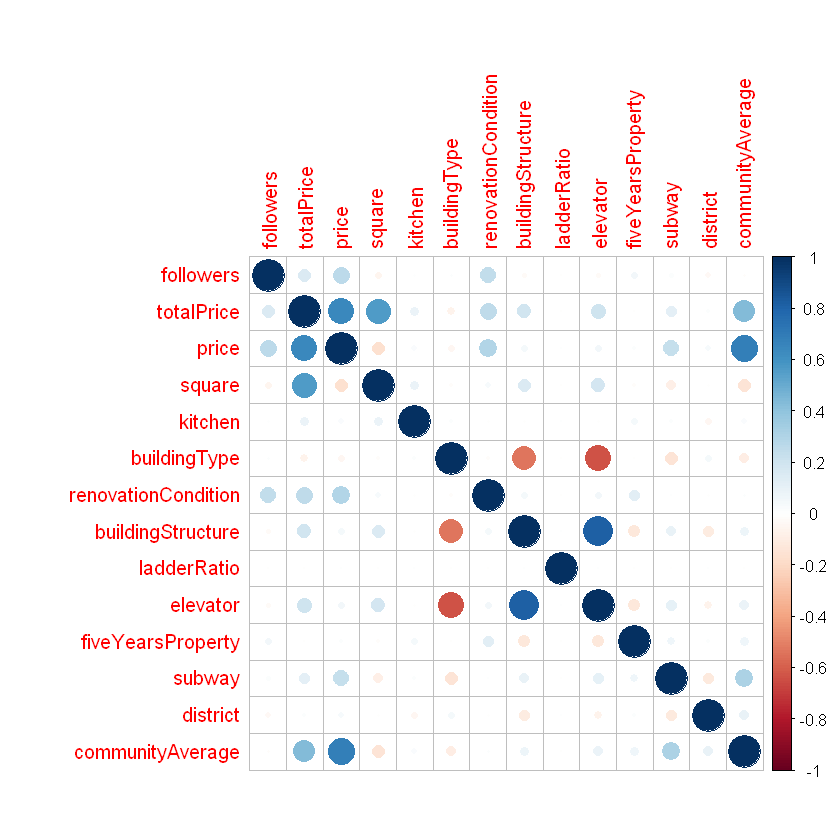

In [22]:
corrplot(cor(num_data),method="circle")

In [23]:
load("D:/1.2.IBM-ICE_CSP-DATA SCIENCE-Spring 2020/Z+PROJECT/Beijing/beijing_map.RData/beijing_map.RData",verbose = TRUE)

Loading objects:
  beijing


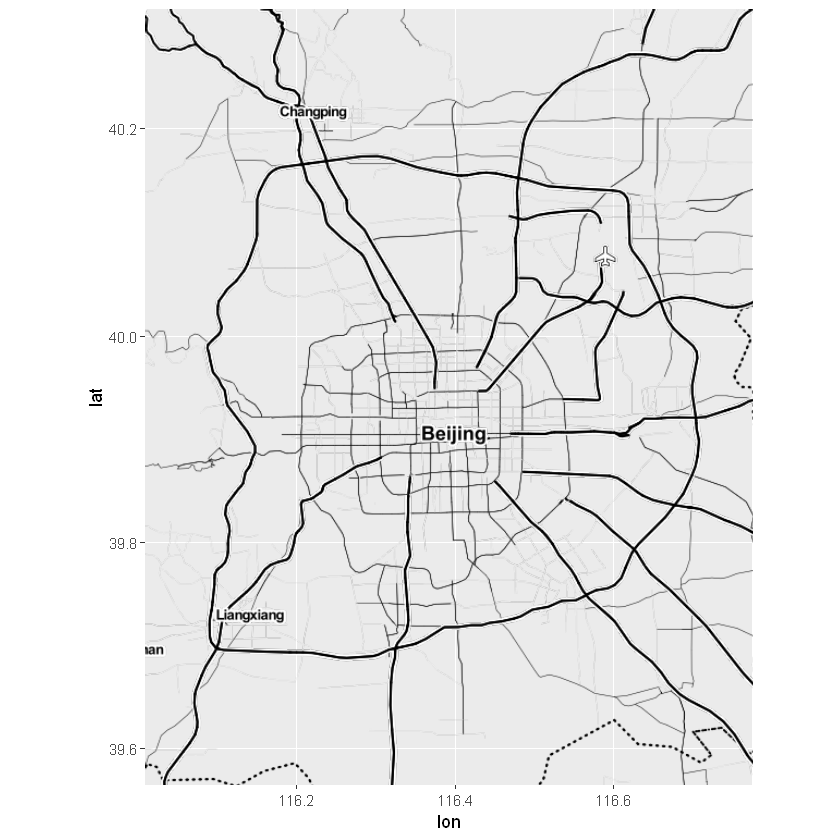

In [24]:
beijing

In [33]:
unique(data$buildingType)
cat("No of Building Type= ",length(unique(data$buildingType)))

[1] 1.000 4.000 3.000   NaN 2.000 0.500 0.333 0.125 0.250 0.429 0.048 0.375
[13] 0.667

No of Building Type=  13

The building type has 13 values but metadata mentions only 4,so it has to be cleaned, also change it to factor type

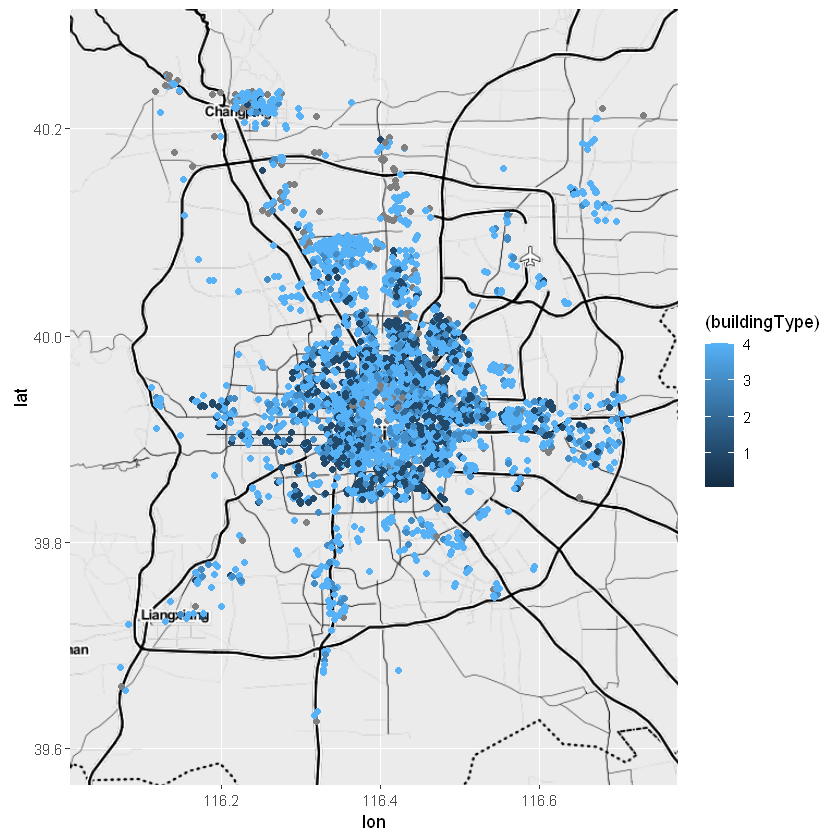

In [34]:
beijing+geom_point(data=data,aes(Lng, Lat, color = (buildingType)),alpha=1,na.rm=T)